### Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under $20), coffee houses, carry out & take away, bar, and more expensive restaurants ($20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [36]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


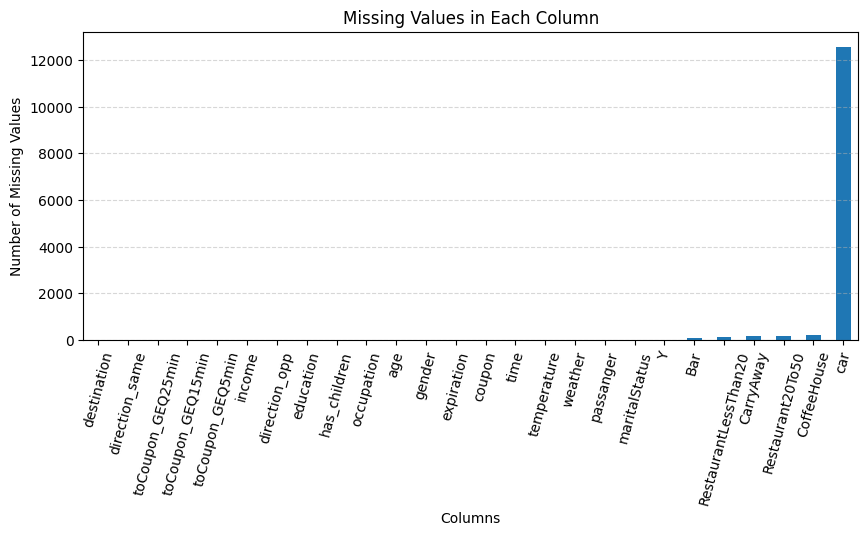

In [26]:
# Identify missing data
print(data.isnull().sum())

# Visualize the missing data
plt.figure(figsize=(10, 4))
missing_data = data.isnull().sum().sort_values().plot(kind='bar')
plt.title('Missing Values in Each Column', fontsize=12)
plt.xlabel('Columns', fontsize=10)
plt.ylabel('Number of Missing Values', fontsize=10)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<span style="color:green; font-weight:bold;">Findings: </span>From above table and figure, we can find that six columns containi null values, with the 'car' colum having the highest number of missing entries.

3. Decide what to do about your missing data -- drop, replace, other...

In [29]:
# Find the unique values in 'car' column
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [30]:
# Find out the percentage of missing data in the car column 
data['car'].isnull().sum()/data.shape[0]

np.float64(0.9914853358561968)

In [37]:
print("Before dropping missing values:", data.shape)

# Since the car column has over 99% of its values missing, we can drop this column from the dataset. 
data = data.drop(columns=['car'])

# For the other five columns with only a small percentage of missing values, we can handle the issue by dropping the rows containing null values.
data = data.dropna()

print("After dropping missing values:", data.shape)


Before dropping missing values: (12684, 26)
After dropping missing values: (12079, 25)


In [38]:
# Check for duplicates
print("Before removing duplicates:", data.shape)
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

Before removing duplicates: (12079, 25)
After removing duplicates: (12007, 25)


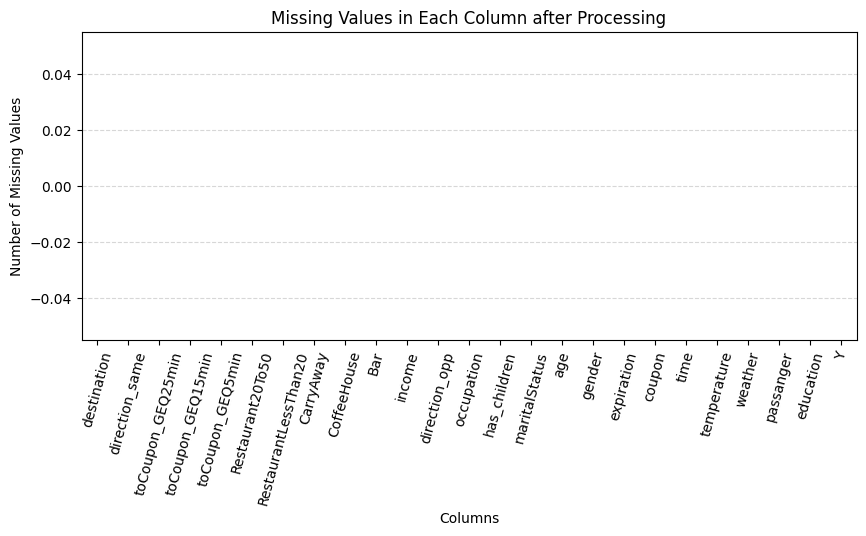

In [40]:
# Make sure no missing values
plt.figure(figsize=(10, 4))
missing_data = data.isnull().sum().sort_values().plot(kind='bar')
plt.title('Missing Values in Each Column after Processing', fontsize=12)
plt.xlabel('Columns', fontsize=10)
plt.ylabel('Number of Missing Values', fontsize=10)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

4. What proportion of the total observations chose to accept the coupon?



In [42]:
data['Y'].unique()


array([1, 0])

In [46]:
coupon_accepted = data[data['Y'] == 1].shape[0]
print("Coupon accepted: ", coupon_accepted)
total_responses = data.shape[0]
print("Total responses: ", total_responses)
percent_accepted = round((coupon_accepted/total_responses)*100, 2)
print("Proportion that selects to accept the coupon (%):", percent_accepted)




Coupon accepted:  6825
Total responses:  12007
Proportion that selects to accept the coupon (%): 56.84


5. Use a bar plot to visualize the `coupon` column.

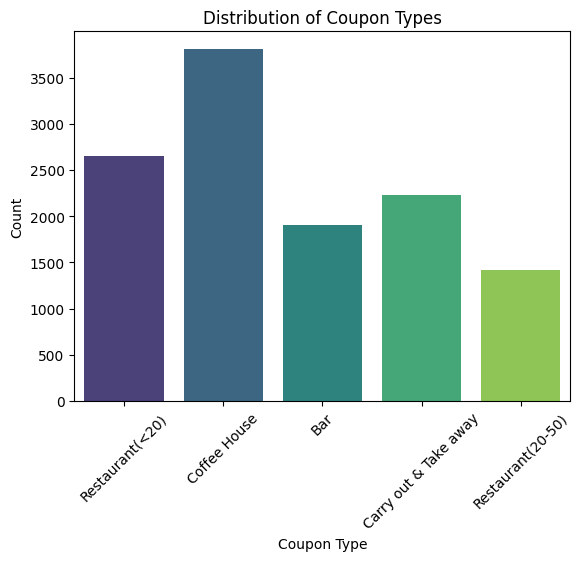

In [54]:
sns.countplot(data=data, x='coupon', hue='coupon', palette='viridis')  
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

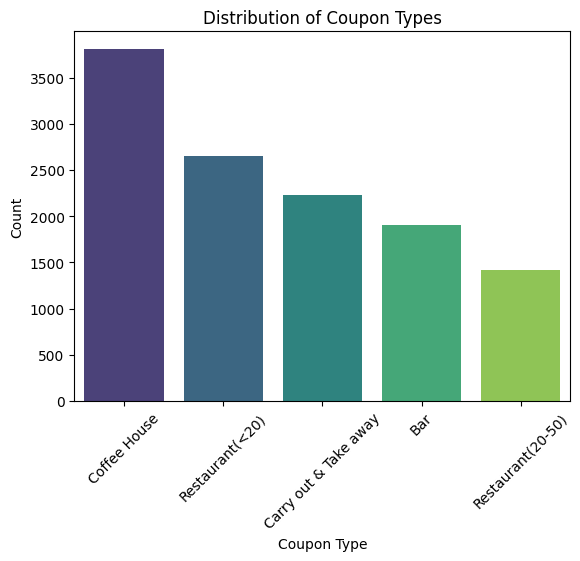

In [ ]:
# Below is the same as above but implemented using barplot
sns.barplot(x=data.coupon.value_counts().index, y=data.coupon.value_counts(), hue=data.coupon.value_counts().index, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

In [55]:
data['temperature'].unique()

array([55, 80, 30])

Text(0.5, 1.0, 'Histogram of Temperature')

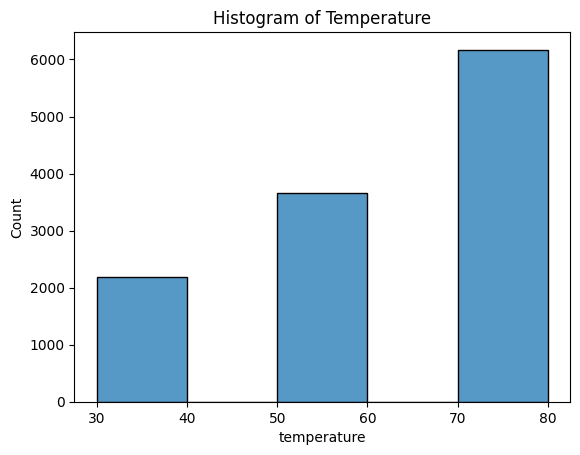

In [63]:
sns.histplot(data, x='temperature', binwidth=10)
plt.title('Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [81]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [82]:
data_bar = data.query("coupon == 'Bar'")
print("shape of new DataFrame that contains just the bar coupons: ", data_bar.shape)


shape of new DataFrame that contains just the bar coupons:  (1906, 25)


2. What proportion of bar coupons were accepted?


In [83]:
bar_coupon_accepted = data_bar[data_bar['Y'] == 1].shape[0]
print("Bar coupon accepted: ", bar_coupon_accepted)
bar_total_responses = data_bar.shape[0]
print("Total responses of bar coupon: ", bar_total_responses)
bar_percent_accepted = round((bar_coupon_accepted/bar_total_responses)*100, 2)
print("Proportion that selects to accept the bar coupon (%):", bar_percent_accepted)

Bar coupon accepted:  785
Total responses of bar coupon:  1906
Proportion that selects to accept the bar coupon (%): 41.19


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [128]:
data_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [129]:
bar_visitors = data_bar[['Bar', 'Y']].copy()
bar_visitors.loc[(bar_visitors.Bar == 'never') | (bar_visitors.Bar == 'less1') | (bar_visitors.Bar == '1~3'), 'Bar'] = '<= 3 times'
bar_visitors.loc[(bar_visitors.Bar == '4~8') | (bar_visitors.Bar == 'gt8'), 'Bar'] = '> 3 times'
bar_visitors = bar_visitors.groupby('Bar').agg({'Bar': 'count', 'Y': 'sum'})
bar_visitors.rename(columns = {'Bar': 'Total', 'Y': 'Accepted'}, inplace = True)
bar_visitors = bar_visitors.reset_index()
bar_visitors['Percentage_accepted'] = round((bar_visitors['Accepted']/bar_visitors['Total']) * 100, 2)
bar_visitors

,Bar,Total,Accepted,Percentage_accepted
0,<= 3 times,1713,638,37.24
1,> 3 times,193,147,76.17


Text(0, 0.5, 'Coupon acceptance rate (%)')

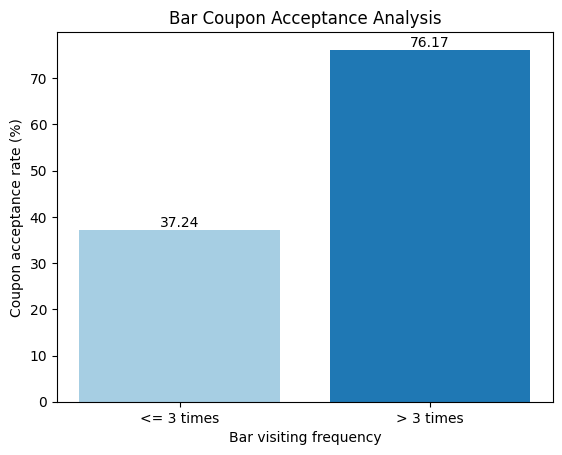

In [183]:
# Visualize the comparison by a bar chart
colors = plt.cm.Paired(range(len(bar_visitors)))
bar_chart = plt.bar(bar_visitors.Bar, bar_visitors.Percentage_accepted, color = colors)
plt.bar_label(bar_chart)
plt.title('Bar Coupon Acceptance Analysis')
plt.xlabel('Bar visiting frequency')
plt.ylabel('Coupon acceptance rate (%)')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [127]:
data_bar.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [153]:
df_bar = data_bar[['Bar', 'age', 'Y']].copy()

# make the age column to numeric
df_bar.age = df_bar.age.str.replace('50plus', '50').str.replace('below21', '20')
df_bar.age = pd.to_numeric(df_bar.age)

# add a new column bar_frequent_25_older
df_bar['bar_frequent_25_older'] = np.where((df_bar.age > 25) & ((df_bar.Bar == '1~3') | (df_bar.Bar == 'gt8') | 
                                        (df_bar.Bar == '4~8')), 'Yes', 'No')

df_bar = df_bar.groupby('bar_frequent_25_older').agg({'bar_frequent_25_older': 'count', 'Y': 'sum'})
df_bar.rename(columns = {'bar_frequent_25_older': 'Total', 'Y': 'Accepted'}, inplace = True)
df_bar = df_bar.reset_index()
df_bar['Percentage_accepted'] = round((df_bar['Accepted']/df_bar['Total']) * 100, 2)
df_bar


,bar_frequent_25_older,Total,Accepted,Percentage_accepted
0,No,1503,507,33.73
1,Yes,403,278,68.98


Text(0, 0.5, 'Coupon acceptance rate (%)')

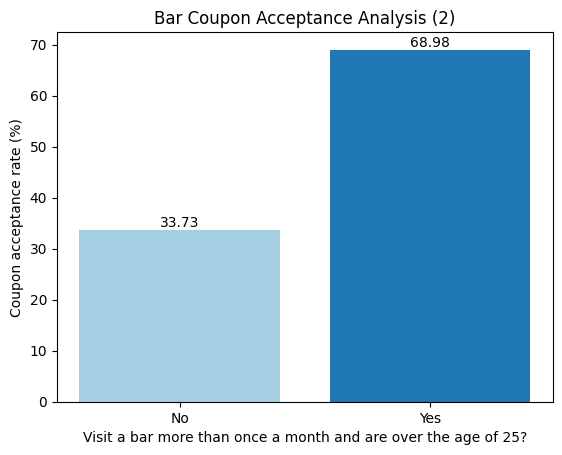

In [182]:
# Visualize the comparison by a bar chart
colors = plt.cm.Paired(range(len(df_bar)))
bar_chart = plt.bar(df_bar.bar_frequent_25_older, df_bar.Percentage_accepted, color = colors)
plt.bar_label(bar_chart)
plt.title('Bar Coupon Acceptance Analysis (2)')
plt.xlabel('Visit a bar more than once a month and are over the age of 25?')
plt.ylabel('Coupon acceptance rate (%)')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [151]:
data_bar.passanger.unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [152]:
data_bar.occupation.unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [157]:
df_bar3 = data_bar[['Bar', 'passanger', 'occupation', 'Y']].copy()

# add a new column called bar_frequent_nokids_job
df_bar3['bar_frequent_nokids_job'] = np.where(
    ((df_bar3.Bar == '1~3') | (df_bar3.Bar == 'gt8') | (df_bar3.Bar == '4~8')) 
    & (df_bar3.passanger != 'Kid(s)')
    & (df_bar3.occupation != 'Farming Fishing & Forestry'), 'Yes', 'No')

df_bar3 = df_bar3.groupby('bar_frequent_nokids_job').agg({'bar_frequent_nokids_job': 'count', 'Y': "sum"})
df_bar3.rename(columns = {'bar_frequent_nokids_job': 'Total', 'Y': 'Accepted'}, inplace = True)
df_bar3 = df_bar3.reset_index()
df_bar3['Percentage_accepted'] = round((df_bar3['Accepted']/df_bar3['Total']) * 100, 2)
df_bar3

,bar_frequent_nokids_job,Total,Accepted,Percentage_accepted
0,No,1376,409,29.72
1,Yes,530,376,70.94


Text(0, 0.5, 'Coupon acceptance rate (%)')

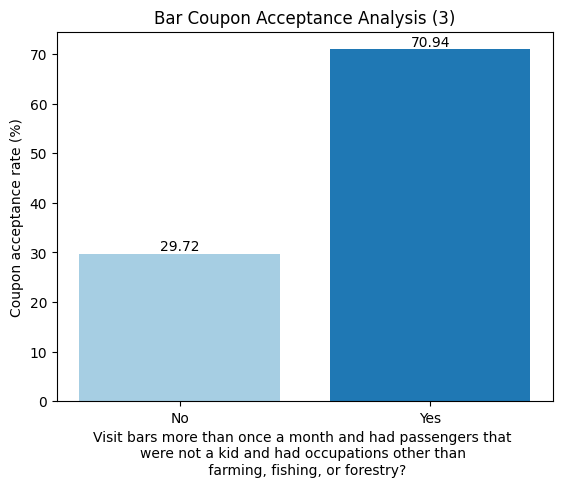

In [181]:
# Visualize the comparison by a bar chart
colors = plt.cm.Paired(range(len(df_bar3)))
bar_chart = plt.bar(df_bar3.bar_frequent_nokids_job, df_bar3.Percentage_accepted, color = colors)
plt.bar_label(bar_chart)
plt.title('Bar Coupon Acceptance Analysis (3)')
plt.xlabel('Visit bars more than once a month and had passengers that \nwere not a kid and had occupations other than \n farming, fishing, or forestry?')
plt.ylabel('Coupon acceptance rate (%)')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [162]:
data_bar.maritalStatus.unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [163]:
data_bar.income.unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [164]:
data_bar.Restaurant20To50.unique()

array(['less1', 'never', '1~3', 'gt8', '4~8'], dtype=object)

In [165]:
data_bar.RestaurantLessThan20.unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [171]:
data_bar.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [ ]:
df = data_bar[["maritalStatus","age","income","passanger","Bar","occupation","RestaurantLessThan20","Y"]].copy()
condition1 = (df.Bar.isin(['1~3', '4~8', 'gt8'])) & (df.passanger != 'Kid(s)') & (df.maritalStatus != 'Widowed')
condition2 = (df.Bar.isin(['1~3', '4~8', 'gt8'])) & (df.age.isin(['21', 'below21']))
condition3 = (df.RestaurantLessThan20.isin(['4~8', 'gt8'])) & (df.income.isin(['$12500 - $24999', 
        '$37500 - $49999', '$25000 - $37499', 'Less than $12500']))

# Subset data based on conditions
group1 = df[condition1]
group2 = df[condition2]
group3 = df[condition3]
#group3.sample(20)

# Calculate acceptance rates
rate1 = round(group1['Y'].mean() * 100, 2)
rate2 = round(group2['Y'].mean() * 100, 2)
rate3 = round(group3['Y'].mean() * 100, 2)

# Print results
print(f"Acceptance rate for Condition 1: {rate1}%")
print(f"Acceptance rate for Condition 2: {rate2}%")
print(f"Acceptance rate for Condition 3: {rate3}%")


Acceptance rate for Condition 1: 70.94%
Acceptance rate for Condition 2: 67.46%
Acceptance rate for Condition 3: 45.65%


Text(0, 0.5, 'Coupon acceptance rate (%)')

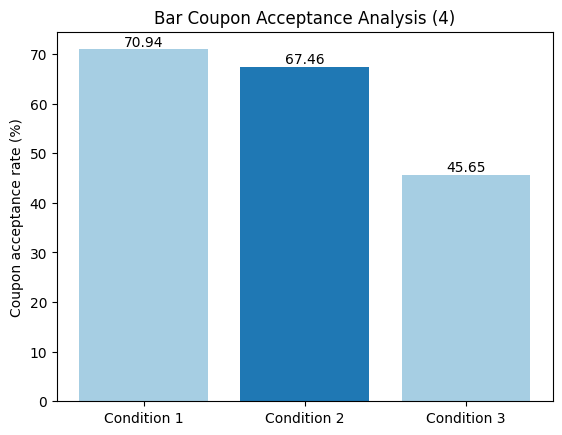

In [180]:
# Visualize the comparison by a bar chart
conditions = ['Condition 1', 'Condition 2', 'Condition 3']
rates = [rate1, rate2, rate3]
colors = plt.cm.Paired(range(len(df_bar3)))
bar_chart = plt.bar(conditions, rates, color = colors)
plt.bar_label(bar_chart)
plt.title('Bar Coupon Acceptance Analysis (4)')
plt.ylabel('Coupon acceptance rate (%)')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers are twice as likely to accept a bar coupon if they:
1. Visit bar more than three times a month.
2. Visit bar more than once a month and are over 25 years old.
3. Visit bar more than once a month, are not employed in farming, fishing, or forestry ,and have no child passengers.

Overall, frequent bar-goers are significantly more inclined to take advantage of bar coupons compared to other groups.

In contrast, individuals with lower incomes or those who frequently dine at inexpensive restaurants tend to show little interest in bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

First, let's find out the acceptance rate for all the coupon types

In [221]:
acceptance_all = data.groupby('coupon').agg({'coupon': 'count', 'Y': 'sum'})
acceptance_all.rename(columns = {'coupon': 'Total', 'Y': 'Accepted'}, inplace = True)
acceptance_all = acceptance_all.reset_index()
acceptance_all['Percentage_accepted'] = round((acceptance_all['Accepted']/acceptance_all['Total']) * 100, 2)
acceptance_all

,coupon,Total,Accepted,Percentage_accepted
0,Bar,1906,785,41.19
1,Carry out & Take away,2233,1643,73.58
2,Coffee House,3809,1888,49.57
3,Restaurant(20-50),1413,631,44.66
4,Restaurant(<20),2646,1878,70.98


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

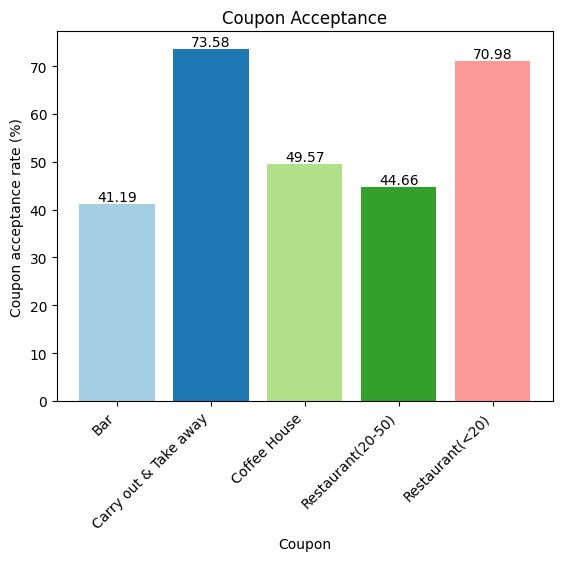

In [260]:
# Visualize the result by a bar chart
colors = plt.cm.Paired(range(len(acceptance_all)))
bar_chart = plt.bar(acceptance_all.coupon, acceptance_all.Percentage_accepted, color = colors)
plt.bar_label(bar_chart)
plt.title('Coupon Acceptance')
plt.xlabel('Coupon')
plt.ylabel('Coupon acceptance rate (%)')
plt.xticks(rotation=45, ha='right')

<span style="color:green; font-weight:bold;">Findings: </span> 

Carryout & takeaway coupons and those for cheaper restaurants have the highest acceptance rates, indicating strong customer preference for these options. Bar coupons, on the other hand, have the lowest acceptance rates. Coffee house coupons show a nearly equal split in acceptance, with a rate of 49.57%. Let us investigate it further. 


#### Let us investiage coffee house coupon

In [235]:
# reate a new dataframe that is filtered for coffee house coupon only
coffee = data.query("coupon == 'Coffee House'").copy()
coffee.shape


(3809, 25)

In [233]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3809 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3809 non-null   object
 1   passanger             3809 non-null   object
 2   weather               3809 non-null   object
 3   temperature           3809 non-null   int64 
 4   time                  3809 non-null   object
 5   coupon                3809 non-null   object
 6   expiration            3809 non-null   object
 7   gender                3809 non-null   object
 8   age                   3809 non-null   object
 9   maritalStatus         3809 non-null   object
 10  has_children          3809 non-null   int64 
 11  education             3809 non-null   object
 12  occupation            3809 non-null   object
 13  income                3809 non-null   object
 14  Bar                   3809 non-null   object
 15  CoffeeHouse           3809 non-null   obj

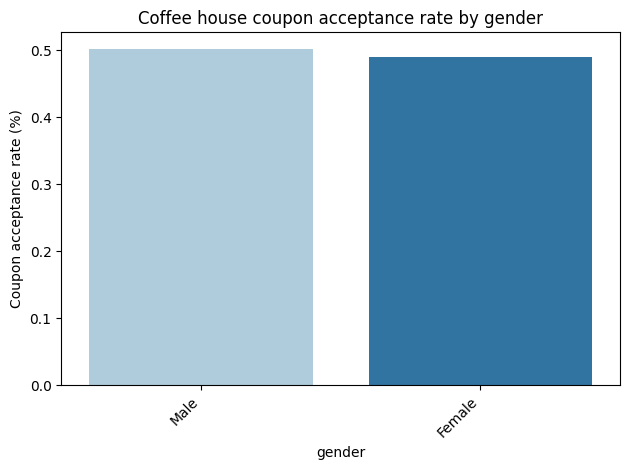

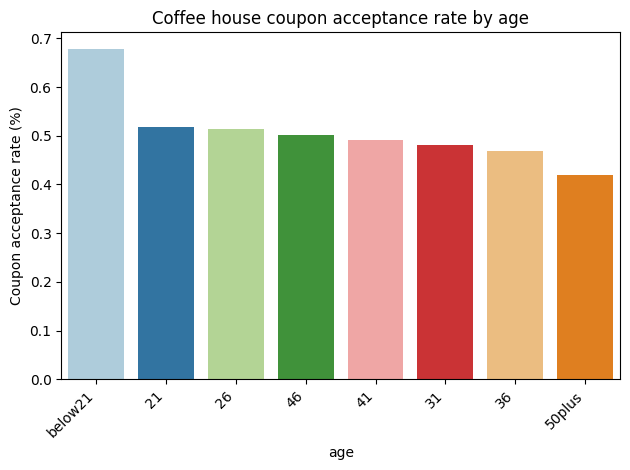

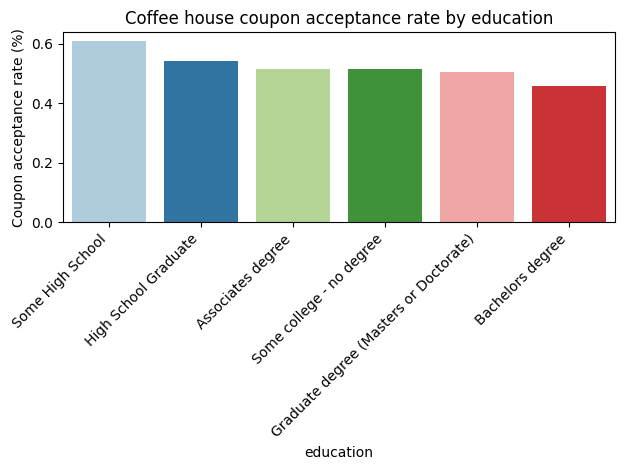

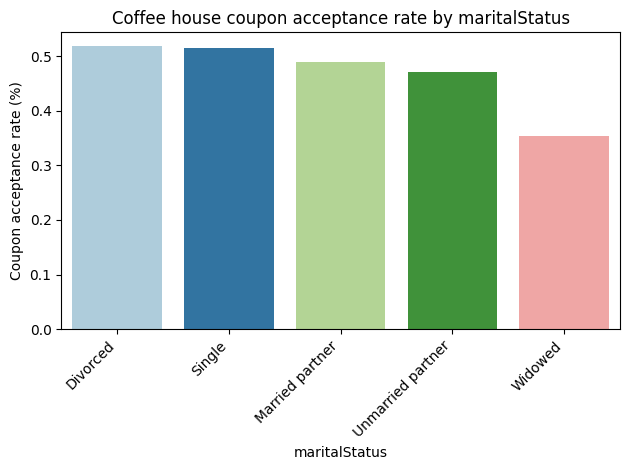

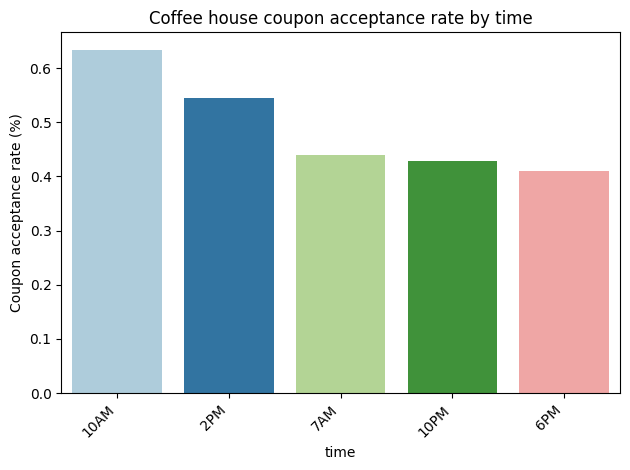

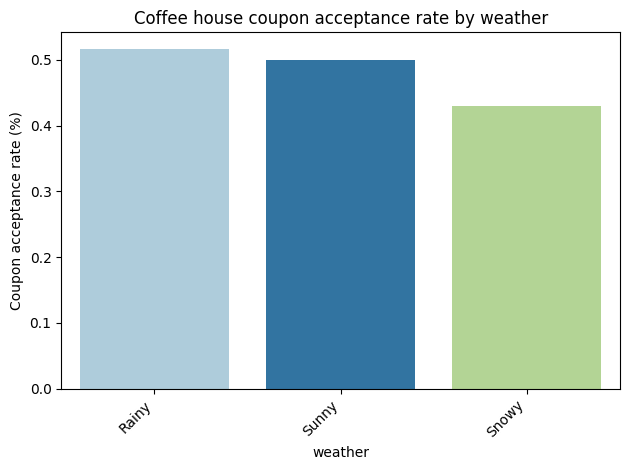

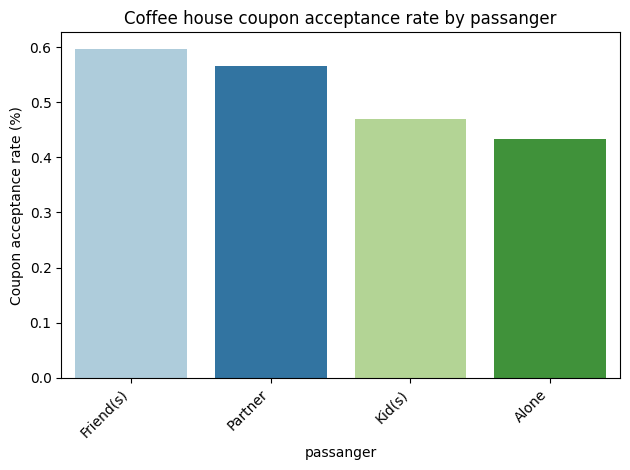

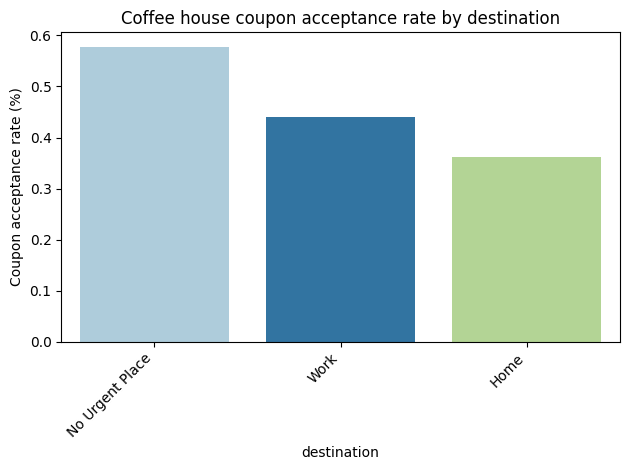

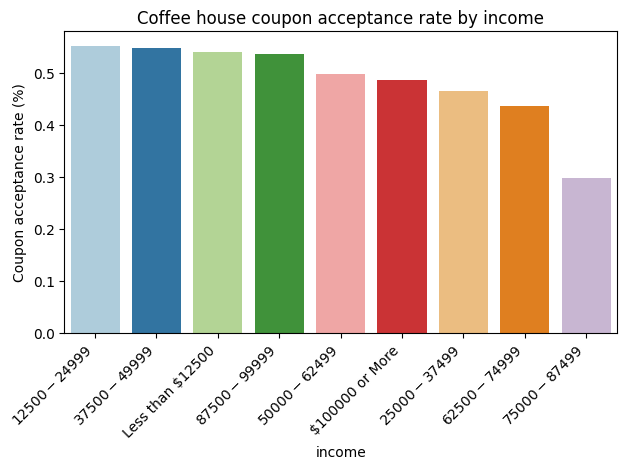

In [265]:
# Find how category features relates to coupon acceptance
categorical_cols = ['gender', 'age', 'education', 'maritalStatus', 'time', 'weather', 'passanger', 'destination', 'income']

for col in categorical_cols:
    acceptance_rate = (
        coffee.groupby(col)['Y'].mean().sort_values(ascending=False)
    )
    
    sns.barplot(x=acceptance_rate.index, y=acceptance_rate.values, hue=acceptance_rate.index, palette='Paired')
    plt.title(f'Coffee house coupon acceptance rate by {col}')
    plt.ylabel('Coupon acceptance rate (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    plt.pause(0.5)

<span style="color:green; font-weight:bold;">Findings: </span> 
1. Drivers are more inclined to accept coffee house coupons under specific conditions:
	- Age: Younger drivers under 21 are the most frequent coffee consumers, while individuals aged 50+ consume the least.
	- Marital Status: Singles and divorced individuals show higher coffee consumption compared to others.
	- Timing: Coffee consumption peaks around 10 AM and 2 PM.
	- Companionship: Drivers accompanied by friends or partners are more likely to accept coffee house coupons.
	- Purpose of Travel: Drivers without an urgent destination are more open to accepting coupons.

2. Neutral Factors:
	- Weather: Has minimal influence on coupon acceptance.
	- Gender: Has little to no effect on coupon acceptance rates.
	- Income: Acceptance rates remain consistent across income groups, typically around 50%, showing negligible influence on coffee coupon acceptance.

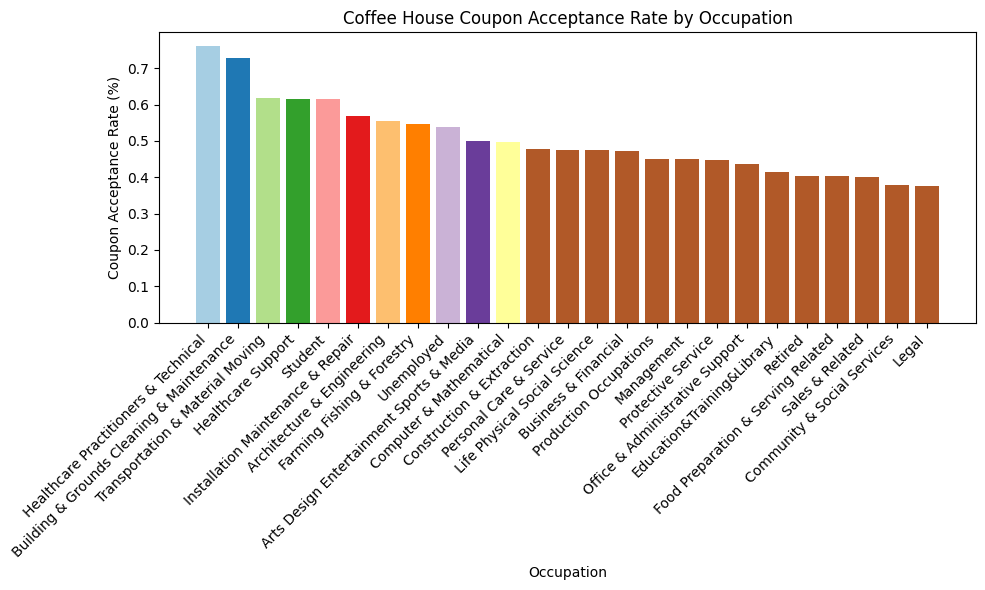

In [263]:
# Illustrate the impact of occupation on coffee coupon acceptance 
occupation = coffee.groupby('occupation')['Y'].mean().sort_values(ascending=False)
colors = plt.cm.Paired(range(len(occupation)))

plt.figure(figsize=(10, 6))
bar_chart = plt.bar(occupation.index, occupation.values, color=colors)
plt.title('Coffee House Coupon Acceptance Rate by Occupation')
plt.ylabel('Coupon Acceptance Rate (%)')
plt.xlabel('Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<span style="color:green; font-weight:bold;">Findings: </span>

Drivers in “healthcare practitioners & technical” and “building & grounds cleaning & maintenance” occupations show the highest coffee consumption. Following them are groups such as “transportation & material moving,” “healthcare support,” and “students.” For all other occupations, the acceptance rate remains consistent within the 45% to 55% range.